# ¡Hola!  

Mi nombre es Maria Efimova, soy code reviewer de Practicum y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

# Análisis del riesgo de incumplimiento de los prestatarios

El proyecto consiste en preparar un informe para la división de préstamos de un banco. Debemos averiguar si el estado civil y el número de hijos de un cliente tienen un impacto en el incumplimiento de pago de un préstamo. El banco ya tiene algunos datos sobre la solvencia crediticia de los clientes.

El informe se tendrá en cuenta al crear una **puntuación de crédito** para un cliente potencial. La **puntuación de crédito** se utiliza para evaluar la capacidad de un prestatario potencial para pagar su préstamo.

Con este análisis podremos evaluar el riesgo y los porcentajes de cumplimiento de los clientes dependiendo de su situación y estilo de vida.

## Abre el archivo de datos y mira la información general. 

In [417]:
# Cargar todas las librerías
import pandas as pd

In [418]:
# Carga los datos
df = pd.read_csv('/datasets/credit_scoring_eng.csv')

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Debes separar la importación de datos de la importación de librerías en esta sección

## Ejercicio 1. Exploración de datos

**Descripción de los datos**
- `children` - el número de hijos en la familia
- `days_employed` - experiencia laboral en días
- `dob_years` - la edad del cliente en años
- `education` - la educación del cliente
- `education_id` - identificador de educación
- `family_status` - estado civil
- `family_status_id` - identificador de estado civil
- `gender` - género del cliente
- `income_type` - tipo de empleo
- `debt` - ¿había alguna deuda en el pago de un préstamo?
- `total_income` - ingreso mensual
- `purpose` - el propósito de obtener un préstamo

In [419]:
# Vamos a ver cuántas filas y columnas tiene nuestro conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


En el Dataframe analizado tenemos **21525 filas y 12 columnas**

In [420]:
# vamos a mostrar las primeras filas N
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [421]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


Tendemos que analizar detalladamente los datos de las siguientes columnas:
En la columna **children** ya que muestran numeros decimales y negativos y esta hace referencia al numero de hijos.
En la columna **days_employed** tenemos numeros negativos y al mismo tiempo en la columna **income_type** los muestra como empleados, por lo que no podrian ser dias sin empleo.
En la columna **education** podemos ver variables duplicadas con diferentes nombres. ej: secondary education y Secondary Education, por lo que tendremos que arreglar esas variables y verificar si no sucede la misma situacion en las columnas restantes.

In [422]:
# Obtener información sobre los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Existen valores ausentes en las las columnas **days_employed** y **total_income** ya que ambas muestran **19351** datos, cuando deberian tener **21525**

In [423]:
# Veamos la tabla filtrada con valores ausentes de la primera columna donde faltan datos
df[df['days_employed'].isna()]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


Los valores de las columnas **days_employed** y **total_income** parecen tener relacion directa, ya que, ambas columnas muestran el mismo numero de valores ausentes. lo cual puede ser afectado en ambos casos por la misma variable.

In [424]:
# Apliquemos múltiples condiciones para filtrar datos y veamos el número de filas en la tabla filtrada.
valores_ausentes_df = df[df['days_employed'].isna()]
valores_ausentes_income = valores_ausentes_df['total_income'].isna().count()

print(valores_ausentes_df, 
valores_ausentes_income)

       children  days_employed  dob_years            education  education_id  \
12            0            NaN         65  secondary education             1   
26            0            NaN         41  secondary education             1   
29            0            NaN         63  secondary education             1   
41            0            NaN         50  secondary education             1   
55            0            NaN         54  secondary education             1   
...         ...            ...        ...                  ...           ...   
21489         2            NaN         47  Secondary Education             1   
21495         1            NaN         50  secondary education             1   
21497         0            NaN         48    BACHELOR'S DEGREE             0   
21502         1            NaN         42  secondary education             1   
21510         2            NaN         28  secondary education             1   

           family_status  family_status

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Bien inicio!

**Conclusión intermedia**

El número de filas en la tabla filtrada coincide con el número de valores ausentes. Esto quiere decir que existe una variable que esta ocasionando esta situación para ambas columnas. Tratemos de encontrarla o confirmar si es una variable aleatoria.

Tendremos que calcular el porcentaje de valores ausentes en comparación con el total de datos, si este representa menos del 10%, podremos quitarlos y continuar con el análisis sin que afecte el mismo. De lo contrario tendremos que rellenar esos valores ausentes.

In [425]:
# Vamos a investigar a los clientes que no tienen datos sobre la característica identificada y la columna con los valores ausentes
valores_ausentes_df['income_type'].value_counts()

employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: income_type, dtype: int64

In [426]:
# Comprobación de la distribución
print(df['days_employed'].isna().mean()*100)
print(df['total_income'].isna().mean()*100)

10.099883855981417
10.099883855981417


In [427]:
df[df['days_employed'].isnull()].count()

children            2174
days_employed          0
dob_years           2174
education           2174
education_id        2174
family_status       2174
family_status_id    2174
gender              2174
income_type         2174
debt                2174
total_income           0
purpose             2174
dtype: int64

Aqui comprobamos que los valores de las columnas **days_employed** y **total_income** tienen relacion directa, el numero de filas en la tabla filtrada **coincide** (2174 filas) con el numero de valores ausentes en ambas columnas, por lo que la hipotesis de la relacion directa es aceptada, ahora tendremos que buscar esa variable que afecta en ambas columnas.

Despues analizamos el tipo de ingreso de los clientes en los que se muestran valores ausentes y parece no tener relación con el tipo de ingreso, ya que tenemos valores ausentes en todas las formas de ingreso que tenemos en el Dataframe principal.

Al comprobar la distribución, pudimos notar que el porcentaje de los valores ausentes represnetan el 10.09% del total. Teniendo esto en cuenta, no podremos eliminarlos para seguir nuestro analisis. Necesitamos rellenar esos datos encontrando alguna relación o bien, concluir si son aleatorios.

**Posibles razones por las que hay valores ausentes en los datos**

Con los ejercicios anteriores pudimos ver que **no hay relación** entre el ingreso y los dias de trabajo registrados en los clientes, probablemente los datos ausentes sean al azar o algun tema de confidencialidad.

In [428]:
# Comprobando la distribución en el conjunto de datos entero
df.isna().mean()*100


children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64

In [429]:
# Comprueba otras razones y patrones que podrían llevar a valores ausentes
# Buscando razones en otras columnas 
valores_ausentes_df['children'].value_counts()

 0     1439
 1      475
 2      204
 3       36
 20       9
 4        7
-1        3
 5        1
Name: children, dtype: int64

**Conclusión intermedia**

En relación de los hijos con los valores ausentes, no encontramos relación alguna (Verifiquemos si existen patrones en las columnas restantes)

In [430]:
# Comprobación de otros patrones: explica cuáles
valores_ausentes_df['dob_years'].value_counts()

34    69
40    66
31    65
42    65
35    64
36    63
47    59
41    59
30    58
28    57
57    56
58    56
54    55
38    54
56    54
37    53
52    53
39    51
33    51
50    51
51    50
45    50
49    50
29    50
43    50
46    48
55    48
48    46
53    44
44    44
60    39
61    38
62    38
64    37
32    37
27    36
23    36
26    35
59    34
63    29
25    23
24    21
66    20
65    20
21    18
22    17
67    16
0     10
68     9
69     5
20     5
71     5
70     3
72     2
19     1
73     1
Name: dob_years, dtype: int64

In [431]:
valores_ausentes_df['education'].value_counts()

secondary education    1408
bachelor's degree       496
SECONDARY EDUCATION      67
Secondary Education      65
some college             55
Bachelor's Degree        25
BACHELOR'S DEGREE        23
primary education        19
SOME COLLEGE              7
Some College              7
PRIMARY EDUCATION         1
Primary Education         1
Name: education, dtype: int64

In [432]:
valores_ausentes_df['family_status'].value_counts()

married              1237
civil partnership     442
unmarried             288
divorced              112
widow / widower        95
Name: family_status, dtype: int64

In [433]:
valores_ausentes_df['gender'].value_counts()

F    1484
M     690
Name: gender, dtype: int64

In [434]:
df['income_type'].value_counts()

employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64

In [435]:
valores_ausentes_df['debt'].value_counts()

0    2004
1     170
Name: debt, dtype: int64

In [436]:
valores_ausentes_df['purpose'].value_counts()

having a wedding                            92
to have a wedding                           81
wedding ceremony                            76
construction of own property                75
housing transactions                        74
buy real estate                             72
transactions with my real estate            71
purchase of the house for my family         71
transactions with commercial real estate    70
housing renovation                          70
buy commercial real estate                  67
buying property for renting out             65
property                                    62
real estate transactions                    61
buy residential real estate                 61
housing                                     60
building a property                         59
cars                                        57
going to university                         56
to become educated                          55
second-hand car purchase                    54
buying my own

**Conclusiones**

**No encontramos relación de los valores ausentes** con el nivel de educación, la edad de los clientes, estado civil, genero o proposito del credito, pero pudimos observar que los clientes que contienen mas datos ausentes cuentan principalmente con educación secundaria y licenciatura, son mujeres, su estado civil: casados y la mayoria no ha incumplido con pagos en créditos anteriores. sin embargo todavía tenemos que ordenar los datos y corregir los errores que vemos en el dataframe (mismas categorias pero nombres diferentes, edades erroneas y tratar los valores ausentes de una manera analitica, teneindo en cuenta que si los datos tienen una varianza considerable, debemos utilizar la mediana y la media para un conjunto de datos con menos varianza.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Muy bien que aqui usas todos los metodos para analisis. Tambien tienes que poner atencion a los NaN's!

## Transformación de datos

Comienzaremos con la eliminación de duplicados y la corrección de la información educativa si es necesario.

In [437]:
# Veamos todos los valores en la columna de educación para verificar si será necesario corregir la ortografía y qué habrá que corregir exactamente
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [438]:
# Arregla los registros si es necesario

df['education'] = df['education'].str.lower()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Funciona correcto!

In [439]:
# Comprobar todos los valores en la columna para asegurarnos de que los hayamos corregido

df['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [440]:
# Veamos la distribución de los valores en la columna `children`

df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [441]:
porcentaje = (123 / 21525) * 100
print("El porcentaje de valores ausentes en la columna children es:", round(porcentaje, 2), "%")

El porcentaje de valores ausentes en la columna children es: 0.57 %


En esta columna podemos ver que hay **valores atipicos considerables**, lo cual nos indica que deben estar erroneos. Tenemos valores negativos y otros demasiado grandes (-1 y 20). Los errores pudieron ocurrir por un error de dedo al agregar el signo negativo y en agregar un 0 en caso de 20. En esta caso los errores representan un 0.57% del total de los datos. Debido a la cantidad, podemos corregirlos con un analisis critico y quitar tanto el signo, como el 0 del numero 20. Si en este caso, los datos a corregir fueran ausentes (NaN) podriamos reemplazarlos con la media o mediana dependiendo si existen valores atipicos, pero como son valores de error, los corregiremos de esta forma.

In [442]:
# [arregla los datos según tu decisión]
df['children'] = df['children'].replace(20, 2)
df['children'] = df['children'].replace(-1, 1)

In [443]:
# Comprobar la columna `children` de nuevo para asegurarnos de que todo está arreglado

df['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [444]:
# Encuentra datos problemáticos en `days_employed`, si existen, y calcula el porcentaje
df['days_employed'].sort_values().unique()

array([-18388.94990057, -17615.56326563, -16593.47281726, ...,
       401715.81174889, 401755.40047533,             nan])

En la columna **days_employed** podemos ver que tenemos numeros negativos, lo cual no es aceptable. Por otro lado tambien contamos con valores ausentes **NaN** y valores muy grandes que representan demasiados años. Empecemos sustituyendo los numeros negativos por 0, pudimos convertirlos a positivos, pero la cantidad seria demasiado grande, representando años incoherentes para la vida de un ser humano (estos valores se tomaran como extremos y los susituiremos con la media o mediana segun nos dicten los datos

In [445]:
# Aborda los valores problemáticos, si existen.

df['days_employed'] = abs(df['days_employed'])

Aqui reemplazamos los negativos por absolutos para poder sacar la media, mediana y analizar con cual de estos datos reemplazar los absolutos, esto lo pide en el siguiente ejercicio **tabajar con valores ausentes** aqui solo reemplazamos negativos por 0

In [446]:
# Comprobando la existencia de datos negativos en la columa
df['days_employed'].sort_values().unique()

array([2.41416332e+01, 2.42406948e+01, 3.01953372e+01, ...,
       4.01715812e+05, 4.01755400e+05,            nan])

In [447]:
# Comprueba el resultado - asegúrate de que esté arreglado
df.loc[df.loc[:, 'days_employed']<0].count()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [448]:
# Buscando valores tipo Nan
df['days_employed'].isna().sum()

2174

In [449]:
# Comprobamos si existen valores 0 
df.loc[df.loc[:, 'days_employed']==0].count()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

A continuación se realizo el siguiente calculo: una persona puede trabajar de 18 a 65 años, basandonos en la edad para poder empezar a trabajar y la edad para retirarse (47 años de trabajo = 17,155 días)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Correcto!

In [450]:
df.loc[df.loc[:, 'days_employed'] > 17155]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
18,0,400281.136913,53,secondary education,1,widow / widower,2,F,retiree,0,9091.804,buying a second-hand car
24,1,338551.952911,57,secondary education,1,unmarried,4,F,retiree,0,46487.558,transactions with commercial real estate
25,0,363548.489348,67,secondary education,1,married,0,M,retiree,0,8818.041,buy real estate
30,1,335581.668515,62,secondary education,1,married,0,F,retiree,0,27432.971,transactions with commercial real estate
...,...,...,...,...,...,...,...,...,...,...,...,...
21505,0,338904.866406,53,secondary education,1,civil partnership,1,M,retiree,0,12070.399,to have a wedding
21508,0,386497.714078,62,secondary education,1,married,0,M,retiree,0,11622.175,property
21509,0,362161.054124,59,bachelor's degree,0,married,0,M,retiree,0,11684.650,real estate transactions
21518,0,373995.710838,59,secondary education,1,married,0,F,retiree,0,24618.344,purchase of a car


Podemos ver que hay **3447** clientes que rebasan esa cantidad de dias de trabajo. Estos datos extremos los vamos a sustituir por la media o mediana.

In [451]:
media_days = df.loc[df.loc[:, 'days_employed'] < 17155].mean()
median_days = df.loc[df.loc[:, 'days_employed'] < 17155].median()
print(media_days['days_employed'])
print(median_days['days_employed'])

2351.047969140338
1629.8517356117536


Ahora echemos un vistazo a la edad de clientes para ver si hay algún problema allí. Una vez más, piensa qué datos pueden ser extraños en esta columna, es decir, qué dato no puede ser la edad de alguien.]

In [452]:
df['dob_years'].sort_values().unique()

array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

Aqui podemos observar que los unicos datos sospechosos de esta columna son los que tienen edad 0

In [453]:
# Revisa `dob_years` en busca de valores sospechosos y cuenta el porcentaje
# Revisamos que los de 75 años tengan datos que hagan sintonia entre sus horas trabajadas y su edad
años_ext = df[df['dob_years']>=75]
print(años_ext)

      children  days_employed  dob_years            education  education_id  \
8880         0    1678.969771         75  secondary education             1   

        family_status  family_status_id gender    income_type  debt  \
8880  widow / widower                 2      F  civil servant     0   

      total_income             purpose  
8880     24525.224  to become educated  


Aqui podemos ver que el cliente mas grande tiene 75 años y los dias como empleado coinciden con su edad, por lo que no se ve problema alguno

In [454]:
# Revisa `dob_years` en busca de valores sospechosos y cuenta el porcentaje
años_min = df[df['dob_years']== 0]
print(años_min)

       children  days_employed  dob_years            education  education_id  \
99            0  346541.618895          0  secondary education             1   
149           0    2664.273168          0  secondary education             1   
270           3    1872.663186          0  secondary education             1   
578           0  397856.565013          0  secondary education             1   
1040          0    1158.029561          0    bachelor's degree             0   
...         ...            ...        ...                  ...           ...   
19829         0            NaN          0  secondary education             1   
20462         0  338734.868540          0  secondary education             1   
20577         0  331741.271455          0  secondary education             1   
21179         2     108.967042          0    bachelor's degree             0   
21313         0    1268.487728          0  secondary education             1   

      family_status  family_status_id g

In [455]:
porc_dob1 = años_min.count()
porc_dob2 = df['dob_years'].count()
porc_dobtotal = porc_dob1/porc_dob2
print(porc_dobtotal.sum()*100)

5.53774680603949


Aqui podemos ver que existen 101 clientes con edad de 0, por lo que debmos sustituir estos valores por la media de su 'income_type' para ser mas exactos a la hora de reemplazar los datos. No queremos ponerle a un cliente una edad de 30 años (por ejemplo) si en income_type aparece como retirado, deberiamos ponerla la media de los retirados

In [456]:
# Resuelve los problemas en la columna `dob_years`, si existen
df['dob_years'].isna().count()

21525

In [457]:
media_dob = int((df['dob_years'].mean()))
media_dob

43

In [458]:
df['dob_years'].fillna(int(df['dob_years'].mean()), inplace = True)
df['dob_years'].isna().count()

21525

In [459]:
# Comprueba el resultado - asegúrate de que esté arreglado


In [460]:
# Veamos los valores de la columna
print(df['family_status'].unique())
print('----------------------------')
print(df['family_status'].describe())

['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']
----------------------------
count       21525
unique          5
top       married
freq        12380
Name: family_status, dtype: object


La columna **family_status** no presenta ningun error a simple vista, todo parece correcto

In [461]:
# Veamos los valores en la columna
print(df['gender'].unique())
print('----------------------------')
print(df['gender'].describe())

['F' 'M' 'XNA']
----------------------------
count     21525
unique        3
top           F
freq      14236
Name: gender, dtype: object


In [462]:
# Aborda los valores problemáticos, si existen
XNA_values = df[df['gender']=='XNA']
print(XNA_values)

       children  days_employed  dob_years     education  education_id  \
10701         0    2358.600502         24  some college             2   

           family_status  family_status_id gender income_type  debt  \
10701  civil partnership                 1    XNA    business     0   

       total_income          purpose  
10701     32624.825  buy real estate  


Como podemos ver, solamente es un cliente el que tiene como genero XNA, asi que lo podemos quitar sin que afecte el conjunto total de datos

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Buen trabajo!

In [463]:
df.drop(df[df['gender']=='XNA'].index, inplace = True)

In [464]:
# Comprueba el resultado - asegúrate de que esté arreglado
print(df['gender'].unique())
print('----------------------------')
print(df['gender'].describe())

['F' 'M']
----------------------------
count     21524
unique        2
top           F
freq      14236
Name: gender, dtype: object


In [465]:
# Veamos los valores en la columna
print(df['income_type'].unique())
print('----------------------------')
print(df['income_type'].describe())

['employee' 'retiree' 'business' 'civil servant' 'unemployed'
 'entrepreneur' 'student' 'paternity / maternity leave']
----------------------------
count        21524
unique           8
top       employee
freq         11119
Name: income_type, dtype: object


Parece ser que en esta columna **no** tenemos probelmas a simple vista

Ahora veamos si hay duplicados en nuestros datos. Si los hay, tendremos que decidir qué hacer con ellos y explicarlo

In [466]:
# Comprobar los duplicados
display(df[df.duplicated()])

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,NaN,41,secondary education,1,married,0,F,employee,0,NaN,purchase of the house for my family
3290,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
4182,1,NaN,34,bachelor's degree,0,civil partnership,1,F,employee,0,NaN,wedding ceremony
4851,0,NaN,60,secondary education,1,civil partnership,1,F,retiree,0,NaN,wedding ceremony
5557,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0,NaN,64,secondary education,1,married,0,F,retiree,0,NaN,supplementary education
21032,0,NaN,60,secondary education,1,married,0,F,retiree,0,NaN,to become educated
21132,0,NaN,47,secondary education,1,married,0,F,employee,0,NaN,housing renovation
21281,1,NaN,30,bachelor's degree,0,married,0,F,employee,0,NaN,buy commercial real estate


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Aqui correcto!

No podemos estar seguros de que los duplicados sean debido a las columnas **days_employed** e **income_type** asi que antes de tratar los duplicados, decidimos tratar los datos tipo **NaN** en el siguiente punto del proyecto

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a> Te pido que aqui anades los conclusiones

# Trabajar con valores ausentes

Para acelerar el trabajo con algunos datos, necesitamos trabajar con diccionarios para algunos valores, en los que se proporcionan IDs, como lo son **education_id y family_status_id** Esto nos ayuda a acelerar el proceso porque crean una categorización de clientes, haciendo nuestro analisis mas fácil de procesar

In [467]:
# Encuentra los diccionarios
print(df.groupby('education_id')['education'].unique())
print('------------------------------')
print(df.groupby('family_status_id')['family_status'].unique())

education_id
0      [bachelor's degree]
1    [secondary education]
2           [some college]
3      [primary education]
4        [graduate degree]
Name: education, dtype: object
------------------------------
family_status_id
0              [married]
1    [civil partnership]
2      [widow / widower]
3             [divorced]
4            [unmarried]
Name: family_status, dtype: object


### Restaurar valores ausentes en `total_income`

Encontramos valores ausentes en las columnas **days_employed** y **total_income**, esto lo podemos solucionar creando una categoria de edad para poder abordar los datos ausentes de la mejor manera para no afectar los datos de los clientes

In [468]:
# Vamos a escribir una función que calcule la categoría de edad
def category_age(edad):
    if edad < 18:
        return 'niño'
    elif (edad > 18) & (edad < 25):
        return 'joven'
    elif (edad > 24) & (edad < 65):
        return 'adulto'
    else:
        return 'adulto mayor'
    

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Fucniona correcto! Tambien aqui puedes usar 'case'

In [469]:
# Prueba si la función funciona bien
print(category_age(17))

niño


In [470]:
# Prueba si la función funciona bien
print(category_age(69))

adulto mayor


In [471]:
# Crear una nueva columna basada en la función
df['category_age'] = df['dob_years'].apply(category_age)

In [472]:
# Comprobar cómo los valores en la nueva columna
df['category_age']

0              adulto
1              adulto
2              adulto
3              adulto
4              adulto
             ...     
21520          adulto
21521    adulto mayor
21522          adulto
21523          adulto
21524          adulto
Name: category_age, Length: 21524, dtype: object

Los ingresos de cada cliente deben depender de el grado de **estudios** que tenga el cliente y el **tipo de ingreso** que tiene el cliente, es decir, si es empleado tendra una fuente de ingresos constante, mientras que un empresario podría tener mayor ingreso pero podría variar la frecuencia de ingresos.

Crearemos una tabla que solo tenga datos sin valores ausentes. Estos datos se utilizarán para restaurar los valores ausentes.

In [473]:
# Crea una tabla sin valores ausentes y muestra algunas de sus filas para asegurarte de que se ve bien
df_nan = df[df['total_income'].isnull() == False]
df_nan.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,category_age
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,adulto
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adulto
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,adulto
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,adulto
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,adulto


In [474]:
# Examina los valores medios de los ingresos en función de los factores que identificaste
print(df_nan.groupby('education')['total_income'].mean())
print('---------------------------------------')
print(df_nan.groupby('education')['total_income'].median())

education
bachelor's degree      33142.802434
graduate degree        27960.024667
primary education      21144.882211
secondary education    24594.503037
some college           29040.132990
Name: total_income, dtype: float64
---------------------------------------
education
bachelor's degree      28054.5310
graduate degree        25161.5835
primary education      18741.9760
secondary education    21836.5830
some college           25608.7945
Name: total_income, dtype: float64


In [475]:
# Examina los valores medianos de los ingresos en función de los factores que identificaste
print(df_nan.groupby('income_type')['total_income'].mean())
print('---------------------------------------')
print(df_nan.groupby('income_type')['total_income'].median())

income_type
business                       32386.741818
civil servant                  27343.729582
employee                       25820.841683
entrepreneur                   79866.103000
paternity / maternity leave     8612.661000
retiree                        21940.394503
student                        15712.260000
unemployed                     21014.360500
Name: total_income, dtype: float64
---------------------------------------
income_type
business                       27571.0825
civil servant                  24071.6695
employee                       22815.1035
entrepreneur                   79866.1030
paternity / maternity leave     8612.6610
retiree                        18962.3180
student                        15712.2600
unemployed                     21014.3605
Name: total_income, dtype: float64


Repetiremos tales comparaciones para múltiples factores. Asegurandonos de considerar diferentes aspectos y explicando nuestro razonamiento.



In [476]:
print(df_nan.groupby('family_status')['total_income'].mean())
print('---------------------------------------')
print(df_nan.groupby('family_status')['total_income'].median())

family_status
civil partnership    26692.840381
divorced             27189.354550
married              27041.784689
unmarried            26934.069805
widow / widower      22984.208556
Name: total_income, dtype: float64
---------------------------------------
family_status
civil partnership    23185.477
divorced             23515.096
married              23389.540
unmarried            23149.028
widow / widower      20514.190
Name: total_income, dtype: float64


In [477]:
print(df_nan.groupby('category_age')['total_income'].mean())
print('---------------------------------------')
print(df_nan.groupby('category_age')['total_income'].median())

category_age
adulto          27218.085038
adulto mayor    21542.650450
joven           22690.598566
niño            25334.072890
Name: total_income, dtype: float64
---------------------------------------
category_age
adulto          23539.944
adulto mayor    18471.391
joven           20556.687
niño            24387.070
Name: total_income, dtype: float64


In [478]:
print(df_nan.groupby('gender')['total_income'].mean())
print('---------------------------------------')
print(df_nan.groupby('gender')['total_income'].median())

gender
F    24655.604757
M    30907.144369
Name: total_income, dtype: float64
---------------------------------------
gender
F    21464.845
M    26834.295
Name: total_income, dtype: float64


La caracteristica que mejor define los ingresos a criterio propio es el nivel de **educación** y **tipo de ingreso** ya que es donde mas diferencia podemos ver entre ingresos

In [479]:
#  Escribe una función que usaremos para completar los valores ausentes
df.groupby(['education', 'income_type'])['total_income'].median()

education            income_type                
bachelor's degree    business                       32285.6640
                     civil servant                  27601.7775
                     employee                       26502.5190
                     entrepreneur                   79866.1030
                     retiree                        23078.5230
                     student                        15712.2600
                     unemployed                     32435.6020
graduate degree      civil servant                  17822.7570
                     employee                       31771.3210
                     retiree                        28334.2150
primary education    business                       21887.8250
                     civil servant                  23734.2870
                     employee                       20159.1860
                     retiree                        16415.7850
secondary education  business                       25451.3100
      

In [480]:
# Comprueba si funciona
media_edu_income = df.groupby(['education', 'income_type'])['total_income'].transform('median')
print(media_edu_income)

0        26502.5190
1        21848.8175
2        21848.8175
3        21848.8175
4        18374.8570
            ...    
21520    25451.3100
21521    18374.8570
21522    21848.8175
21523    21848.8175
21524    21848.8175
Name: total_income, Length: 21524, dtype: float64


In [481]:
# Aplícalo a cada fila
df['total_income'].fillna(media_edu_income, inplace = True)

In [482]:
# Comprueba si tenemos algún error
# Comprobar el número de entradas en las columnas
df['total_income'].isna().sum()

0

In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21524 non-null  int64  
 1   days_employed     19350 non-null  float64
 2   dob_years         21524 non-null  int64  
 3   education         21524 non-null  object 
 4   education_id      21524 non-null  int64  
 5   family_status     21524 non-null  object 
 6   family_status_id  21524 non-null  int64  
 7   gender            21524 non-null  object 
 8   income_type       21524 non-null  object 
 9   debt              21524 non-null  int64  
 10  total_income      21524 non-null  float64
 11  purpose           21524 non-null  object 
 12  category_age      21524 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


Aqui podemos ver que tenemos el mismo numero de entradas tanto en **total_income**, como en las demás

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Genial!

###  Restaurar valores en `days_employed`

Los parametros que pueden afectar a la columa **days_employed** directamente, sería la **educación,  los hijos y la edad**
Esto es un criterio propio. La educación esta relacionada directamente a las opciones de trabajo, los hijos tambien pueden afectar directamente a los dias laborales por obvias razones y por parte de la edad, pueden surgir muchas cosas que puedan afectar a los días laborales, como pueden ser; la salud, la familia (abarcando hijos y en su caso, nietos), etc.

In [484]:
# Distribución de las medias de `days_employed` en función de los parámetros identificados

print(df_nan.groupby('education')['days_employed'].mean())


education
bachelor's degree       42375.409174
graduate degree        121323.630206
primary education      130340.426349
secondary education     76413.822372
some college            20683.780431
Name: days_employed, dtype: float64


In [485]:
# Distribución de las medianas de `days_employed` en función de los parámetros identificados
print(df_nan.groupby('education')['days_employed'].median())

education
bachelor's degree      1895.747795
graduate degree        5660.057032
primary education      3043.933615
secondary education    2392.483500
some college           1206.479128
Name: days_employed, dtype: float64


In [486]:
# Distribución de las medias de `days_employed` en función de los parámetros identificados
print(df_nan.groupby('children')['days_employed'].mean())

children
0    92526.171104
1    23454.811112
2     6686.606176
3     9338.376355
4    13863.043444
5     1432.348601
Name: days_employed, dtype: float64


In [487]:
# Distribución de las medianas de `days_employed` en función de los parámetros identificados
print(df_nan.groupby('children')['days_employed'].median())

children
0    2625.852176
1    1669.174020
2    1678.132084
3    1765.066044
4    1905.879025
5    1231.571486
Name: days_employed, dtype: float64


In [488]:
# Distribución de las medias de `days_employed` en función de los parámetros identificados
print(df_nan.groupby('category_age')['days_employed'].mean())

category_age
adulto           58349.311914
adulto mayor    314080.528722
joven             1281.267451
niño             69516.105102
Name: days_employed, dtype: float64


In [489]:
# Distribución de las medianas de `days_employed` en función de los parámetros identificados
print(df_nan.groupby('category_age')['days_employed'].median())

category_age
adulto            2198.059454
adulto mayor    360304.232308
joven              744.279198
niño              1759.038033
Name: days_employed, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Genial!

En esta columna decidimos utilizar la **mediana** para tener datos mas certeros. De esta forma no va a influir los datos atipicos que tenemos en cada categoria

In [490]:
# Escribamos una función que calcule medias o medianas (dependiendo de tu decisión) según el parámetro identificado
df.groupby(['education', 'category_age', 'children'])['days_employed'].median()

education            category_age  children
bachelor's degree    adulto        0             2177.464073
                                   1             1584.039890
                                   2             1716.709143
                                   3             1687.484721
                                   4             1700.748233
                     adulto mayor  0           356926.126511
                                   1           356094.116852
                     joven         0              671.147120
                                   1              612.202602
                                   2              623.140856
                                   4             1126.226131
                     niño          0             1756.243149
                                   1             2782.491667
                                   2             1461.095740
graduate degree      adulto        0             5352.038180
                                   1     

In [491]:
# Comprueba que la función funciona
median_edu_child_age = df.groupby(['education', 'category_age', 'children'])['days_employed'].transform('median')
median_edu_child_age

0          1584.039890
1          1837.681328
2          2855.323599
3          1877.958045
4          2855.323599
             ...      
21520      1837.681328
21521    361304.524658
21522      1837.681328
21523      1877.958045
21524      1686.555490
Name: days_employed, Length: 21524, dtype: float64

In [492]:
# Aplicar la función al income_type
df['days_employed'].isna().sum()

2174

In [493]:
# Comprueba si la función funcionó
df['days_employed'].fillna(median_edu_child_age, inplace=True)

In [494]:
# Reemplazar valores ausentes
df['days_employed'].isna().sum()

1

In [495]:
nan_rows = df[df.isnull().any(1)]

In [496]:
print(nan_rows)

      children  days_employed  dob_years     education  education_id  \
3891         1            NaN         68  some college             2   

     family_status  family_status_id gender income_type  debt  total_income  \
3891      divorced                 3      F    employee     0      24209.43   

                  purpose  category_age  
3891  building a property  adulto mayor  


In [497]:
df['days_employed'].drop(3891, inplace=True)

Aquí **eliminamos** el cliente 3891, ya que, no adopta el relleno de datos. Esto **no afecta** el resultado del conjunto de datos debido a su pequeño imapacto ante el analisis

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a> Aqui hay error!

In [498]:
# Comprueba las entradas en todas las columnas: asegúrate de que hayamos corregido todos los valores ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21524 non-null  int64  
 1   days_employed     21523 non-null  float64
 2   dob_years         21524 non-null  int64  
 3   education         21524 non-null  object 
 4   education_id      21524 non-null  int64  
 5   family_status     21524 non-null  object 
 6   family_status_id  21524 non-null  int64  
 7   gender            21524 non-null  object 
 8   income_type       21524 non-null  object 
 9   debt              21524 non-null  int64  
 10  total_income      21524 non-null  float64
 11  purpose           21524 non-null  object 
 12  category_age      21524 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.8+ MB


## Clasificación de datos

[Para poder responder a las preguntas y probar las diferentes hipótesis, querrás trabajar con datos clasificados. Mira las preguntas formuladas que debes responder. Piensa qué parte de los datos tiene que ser clasificada para responder a estas preguntas. A continuación, encontrarás una plantilla a través de la cual puedes trabajar para clasificar los datos. El primer procesamiento paso a paso cubre los datos de texto; el segundo aborda los datos numéricos que necesitan ser clasificados. Puedes usar ambas o ninguna de las instrucciones sugeridas, eso solo depende de ti.]

[Independientemente de cómo decidas abordar la clasificación, asegúrate de proporcionar una explicación clara de la razón por la que tomaste tu decisión. Recuerda: este es tu trabajo y aquí tú tomas todas las decisiones.]

Los datos de texto que trabajaremos a continuación serán los propositos del prestamo
Los datos numéricos que trabajaremos a continuación serán los de ingreso total, ya que solamente trabajamos la parte de la forma de ingreso.
En ambas columnas tendremos que crean categorias para procesar de manera mas eficiente los datos y su identificación.


In [499]:
# Muestra los valores de los datos seleccionados para la clasificación
df['purpose'].value_counts()


wedding ceremony                            797
having a wedding                            777
to have a wedding                           774
real estate transactions                    676
buy commercial real estate                  664
housing transactions                        653
buying property for renting out             653
transactions with commercial real estate    651
purchase of the house                       647
housing                                     647
purchase of the house for my family         641
construction of own property                635
property                                    634
transactions with my real estate            630
building a real estate                      626
buy real estate                             623
building a property                         620
purchase of my own house                    620
housing renovation                          612
buy residential real estate                 607
buying my own car                       

In [500]:
# Comprobar los valores únicos
df['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

Los principales gupos que identificamos:
**compra de propiedad, compra de coche, educación, boda**
Tendremos que tener cuidado al definir la función, ya que los propositos tienen nombres diferentes y hacen referencia al mismo proposito, por lo que debemos incluirlos todos dentro de la función. **Ej**: house, housing, real estate

In [501]:
# Escribamos una función para clasificar los datos en función de temas comunes
def purpose_category(row):
    if 'hous' in row['purpose'] or 'real est' in row['purpose'] or 'prop' in row['purpose']:
        return 'property'
    if 'car' in row['purpose']:
        return 'car'
    if 'wed' in row['purpose']:
        return 'wedding'
    if 'edu' in row['purpose']:
        return 'education'

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Buen trabajo!

In [502]:
# Crea una columna con las categorías y cuenta los valores en ellas
df['purpose_category'] = df.apply(purpose_category, axis=1)

In [503]:
df['purpose_category'].value_counts()

property     10839
car           4315
education     3526
wedding       2348
Name: purpose_category, dtype: int64

Con esta categrización pudimos agrupar los propositos para una mejor digestión de los datos, quedando como priper proposito del prestamo la compra de propiedades

A continuación analizamos los datos para darnos una idea de los rangos a proponer

In [504]:
# Obtener estadísticas resumidas para la columna
df['total_income'].describe()

count     21524.000000
mean      26456.226535
std       15704.065309
min        3306.762000
25%       17234.929500
50%       22959.150500
75%       31702.882750
max      362496.645000
Name: total_income, dtype: float64

Existen 5 clases sociales en America, categorizadas de la siguiente manera:

* rich: cuartil mayor a 0.99
* high middle class: cuartil entre 0.85 y 0.99
* middle class: cuartil entre 0.6 y 0.85
* lower middle class: cuartil entre 0.25 y 0.6
* poor: cuartil menor a 0.25

In [505]:
def income_class(income):
    q_rich = df['total_income'].quantile(0.99)
    q_high = df['total_income'].quantile(0.85)
    q_middle = df['total_income'].quantile(0.6)
    q_lower = df['total_income'].quantile(0.25)
    if income < q_lower:
        return 'poor'
    if (income >= q_lower) & (income < q_middle):
        return 'lower middle class'
    if (income >= q_middle) & (income < q_high):
        return 'middle class'
    if (income >= q_high) & (income < q_rich):
        return 'high middle class'
    if (income >= q_rich):
        return 'rich'

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Genial!

In [506]:
# Crear una columna con categorías
df['income_class'] = df['total_income'].apply(income_class)

In [507]:
# Contar los valores de cada categoría para ver la distribución
df['income_class'].value_counts()

lower middle class    7533
poor                  5381
middle class          5381
high middle class     3013
rich                   216
Name: income_class, dtype: int64

## Comprobación de las hipótesis


**¿Existe una correlación entre tener hijos y pagar a tiempo?**

In [508]:
# Comprueba los datos sobre los hijos y los pagos puntuales
pd.crosstab(df['debt'], df['children'])

children,0,1,2,3,4,5
debt,,,,,,
0,13085,4420,1929,303,37,9
1,1063,445,202,27,4,0


Esta tabla nos indica la relación entre la deuda y la cantidad de hijos de cada cliente

In [509]:
# Calcular la tasa de incumplimiento en función del número de hijos
df[['debt', 'children']].corr(method='pearson')

,debt,children
debt,1.000000,0.024981
children,0.024981,1.000000


Utilizando el metodo de correlación de Pearson entre el numero de hijos y el estado de la deuda, muestra que el tener hijos no es un factor que afecte directamente al pago de deudas. (El coficiente de correlación es cercano a 0, esto significa que **no hay relación** clara entre las dos variables)

**Conclusión**

Con los numeros anteriores podemos ver que la mayor parte de los clientes con deuda, no tienen hijos. Conclusión; **no existe correlación entre tener hijos y pagar a tiempo**

**¿Existe una correlación entre la situación familiar y el pago a tiempo?**

In [510]:
# Comprueba los datos del estado familiar y los pagos a tiempo
pd.crosstab(df['debt'], df['family_status'])

family_status,civil partnership,divorced,married,unmarried,widow / widower
debt,,,,,
0,3788,1110,11449,2539,897
1,388,85,931,274,63


In [511]:
# Calcular la tasa de incumplimiento basada en el estado familiar
df[['debt', 'family_status_id']].corr(method='pearson')

,debt,family_status_id
debt,1.000000,0.020611
family_status_id,0.020611,1.000000


**Conclusión**

Utilizando el metodo de correlación de Pearson entre la situación familiar y el estado de la deuda, muestra que el estado familiar no es un factor que afecte directamente al pago de deudas. (El coficiente de correlación es cercano a 0, esto significa que **no hay relación** clara entre las dos variables)

**¿Cómo afecta el propósito del crédito a la tasa de incumplimiento?**

In [512]:
# Comprueba los datos del propósito del crédito y los pagos a tiempo
pd.crosstab(df['debt'], df['purpose_category'])

purpose_category,car,education,property,wedding
debt,,,,
0,3912,3199,10057,2162
1,403,327,782,186


In [513]:
# Calcular la tasa de incumplimiento basada en el propósito del crédito
df.groupby('purpose_category')['debt'].mean()

purpose_category
car          0.093395
education    0.092740
property     0.072147
wedding      0.079216
Name: debt, dtype: float64

<AxesSubplot:xlabel='purpose_category'>

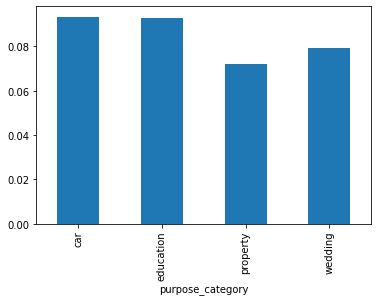

In [514]:
df.groupby('purpose_category')['debt'].mean().plot.bar()

Con la tabla anterior podemos observar la tasa media de incumplimiento para cada proposito

**Conclusión**

Utilizando el metodo de correlación de Pearson entre el proposito del crédito y el estado de la deuda, muestra que el tener proposito del crédito es un factor que **afecta directamente** al pago de deudas. El coficiente de correlación es cercano a 1, esto significa que entre mas propositos de deuda (analizados) tenga el cliente, mayor será su tasa de incumplimiento al crédito

**¿Existe una correlación entre el nivel de ingresos y el pago a tiempo?**

In [515]:
# Consulta los porcentajes de tasa de incumplimiento para cada nivel de ingresos y analízalos
df.groupby('income_class')['debt'].mean()

income_class
high middle class     0.070362
lower middle class    0.087747
middle class          0.079353
poor                  0.079353
rich                  0.064815
Name: debt, dtype: float64

<AxesSubplot:xlabel='income_class'>

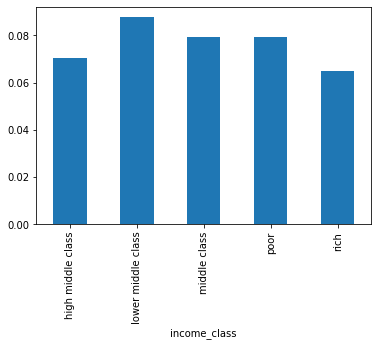

In [516]:
df.groupby('income_class')['debt'].mean().plot.bar()

**Conclusión**

Utilizando el metodo de correlación de Pearson entre el nivel de ingresos y el estado de la deuda, muestra que el nivel de ingresos o la clase social a la que pertenece es un factor que **afecta directamente** al pago de deudas. El coficiente de correlación es cercano a 1, esto significa que su estado social será el que definirá las condiciones de su crédito. Con esta información el banco podrá implementar condiciones en base a las clases sociales para minimizar el riesgo de incumplimiento de los créditos. En este caso, la clase alta es la que mejores condiciones tendrá y la clase media baja con las condiciones menos llamativas.

# Conclusión general 


Al principio de nuestro análisis pudimos observar la **ausencia de valores**, la corrección de estos valores es muy simple, pero conlleva un análisis muy importante ya que, si los datos ausentes son significativos en el conjunto de datos de clientes y préstamos, puede ser difícil realizar un análisis completo y preciso. Los datos ausentes pueden sesgar los resultados, especialmente si los datos faltantes están relacionados con variables que se están analizando. Si se encuentra una gran cantidad de datos faltantes, se pueden tomar medidas para imputar valores para esos campos, como usar la media o la mediana, o incluso descartar filas enteras que contengan datos faltantes (en caso de que estos representen menos del 10% del total de los datos, esto, con la finalidad de no afectar la validez de los resultados).

En cuanto a los **datos duplicados**, pueden afectar negativamente la precisión de cualquier análisis, ya que pueden introducir un sesgo en los resultados. Si se descubren datos duplicados, se pueden tomar medidas para eliminarlos de la tabla de datos antes de realizar cualquier análisis. Esto garantizará que los datos analizados sean precisos y no estén sesgados por datos duplicados.

En cuanto a los **valores atípicos**, es importante tener en cuenta que pueden afectar significativamente los resultados del análisis, especialmente si son muy diferentes de los demás datos en la muestra. En algunos casos, es posible que se deba eliminar estos valores atípicos para que el análisis no esté sesgado. Sin embargo, en otros casos, puede ser importante investigar estos valores atípicos para comprender mejor su origen y su impacto en el análisis. En algunos casos, estos valores atípicos pueden contener información valiosa que puede ser útil para mejorar la precisión del análisis.

Empezamos la **exploración de datos** detectando valores ausentes, valores duplicados y valores atípicos que no hacían coherencia y variables con nombres repetidos, pero con diferentes características.

Entre algunos ejemplos; 
Clientes con 1.5 hijos
Clientes empleados sin tener días de trabajo registrados
Valores ausentes en 2174 clientes de información en total de ingresos y días de trabajo, ambos en relación a la ausencia de estos datos.
En este caso, decidimos no eliminar los datos ya que, el total de clientes con valores ausentes representaba más del 10% del total de clientes, por lo que tuvimos que tratarlos.
Indagamos sobre esta situación y no encontramos relación alguna entre los datos ausentes de ambas columnas.

En la columna de **educación** nos encontramos con nombres de variables diferentes, pero haciendo referencia al mismo fin Ej. BACHELORS DEGREE y bachelors degree, por lo que tratamos los nombres para dejar solamente una variable por cada fin.

En el caso de los **valores negativos** en las columnas de **hijos** y **días trabajados** decidimos tratarlos como valores absolutos, ya que tratarlos como positivos sería un dilema de que valor sustituir sin que afecte el resultado del análisis.

En la situación de los días trabajados, nos encontramos con valores que alcanzaban hasta dos veces la vida laboral de un ser humano, por lo que tuvimos que poner un limite de días trabajados y en base a ese límite, tratamos los valores que excedían tal número, reemplazándolos por la mediana de los números dentro del rango propuesto.

Otra situación con la que nos enfrentamos fue con el **género**, este arrojaba los siguientes por default: **Masculino, Femenino y XNA**, al revisar cuantos clientes estaban catalogados como genero XNA, nos dimos cuenta que solamente era uno, por lo que optamos por eliminarlo sin afectar al análisis.
Después **categorizamos** tres columnas; edades, propósitos del préstamo y total de ingresos

* Para la categorización de edades, definimos niños, jóvenes, adultos y adultos mayores
* Para la categorización de propósitos, definimos propiedades, coches, educación y boda
* Para la categorización de clases sociales, definimos 4; clase baja, clase media baja, clase media alta y clase alta

Todo esto para poder tratar de manera mas eficiente los datos y lograr un análisis más certero.

Con todas estas situaciones que abordamos, pudimos llegar a la **comprobación de hipótesis** con datos listos para su uso y las conclusiones fueron las siguientes:

* Pudimos ver que la mayor parte de los clientes con deuda, no tienen hijos. Conclusión; no existe correlación entre tener hijos y pagar a tiempo.
* El estado familiar no es un factor que afecte directamente al pago de deudas. La mayor parte de los deudores no tienen hijos.
* El tener propósito del crédito es un factor que afecta directamente al pago de deudas. Entre más propósitos de deuda (analizados) tenga el cliente, mayor será su tasa de incumplimiento al crédito
* El nivel de ingresos y el estado de la deuda, muestra que el nivel de ingresos o la clase social a la que pertenece es un factor que afecta directamente al pago de deudas. Su estado social será el que definirá las condiciones de su crédito. Con esta información el banco podrá implementar condiciones en base a las clases sociales para minimizar el riesgo de incumplimiento de los créditos. En este caso, la clase alta es la que mejores condiciones tendrá y la clase media baja con las condiciones menos llamativas.





<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Muchas gracias por tu trabajo! Te pido ver mis comentarios y cambiar en los que tienen color 'rojo', despues estoy lista para aceptar tu proyecto!